In [31]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

# sql 함수 사용
from pyspark.sql.functions import when, udf, col, regexp_replace
# sql 타입변경
from pyspark.sql.types import DoubleType,IntegerType, StringType

In [2]:
sc = SparkContext('local') # 'spark://ip:7070'
sqlCtx = SQLContext( sc )

In [5]:
df = sqlCtx.read.csv(r'c:\data\births.txt',inferSchema=True)
df

DataFrame[_c0: int, _c1: double, _c2: double]

In [21]:
# 컬럼명 변경
df = df.withColumnRenamed('_c0','year').\
        withColumnRenamed('_c1','boys').\
        withColumnRenamed('_c2','girls')

In [25]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- boys: double (nullable = true)
 |-- girls: double (nullable = true)



In [22]:
df.show()

+----+--------+--------+
|year|    boys|   girls|
+----+--------+--------+
|1880| 90993.0|110491.0|
|1881| 91954.0|100745.0|
|1882|107850.0|113688.0|
|1883|112321.0|104629.0|
|1884|129022.0|114445.0|
|1885|133055.0|107800.0|
|1886|144535.0|110784.0|
|1887|145982.0|101414.0|
|1888|178627.0|120853.0|
|1889|178366.0|110584.0|
|1890|190377.0|111025.0|
|1891|185482.0|101196.0|
|1892|212346.0|122037.0|
|1893|212906.0|112317.0|
|1894|222922.0|115772.0|
|1895|233630.0|117398.0|
|1896|237920.0|119570.0|
|1897|234202.0|112758.0|
|1898|258770.0|122693.0|
|1899|233023.0|106212.0|
+----+--------+--------+
only showing top 20 rows



### 1. 2000년도 이후 데이터를 구하시요


In [52]:
a=2000
df.where(f'year >= {a}').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|2000|1814601.0|1962406.0|
|2001|1799049.0|1941251.0|
|2002|1795206.0|1939815.0|
|2003|1825359.0|1973434.0|
|2004|1834145.0|1982794.0|
|2005|1845379.0|1994841.0|
|2006|1898463.0|2052377.0|
|2007|1919408.0|2072139.0|
|2008|1887234.0|2036289.0|
|2009|1832925.0|1979303.0|
|2010|1772738.0|1913851.0|
|2011|1753500.0|1893230.0|
+----+---------+---------+



### 2. 1995~2000 년도 데이터를 구하시요

In [53]:
a=1995
b=2000
df.where(f'year between {a} and {b} ').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|1995|1757927.0|1902832.0|
|1996|1752249.0|1893378.0|
|1997|1739806.0|1884122.0|
|1998|1765915.0|1910250.0|
|1999|1772632.0|1918809.0|
|2000|1814601.0|1962406.0|
+----+---------+---------+



### 3. 남아출생이 가장많은 top5를 구하시요(년도,남아수 출력)

In [51]:
df.select('year','boys').orderBy('boys', ascending= False ).show(5)

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+
only showing top 5 rows



### 4. 남아율(%)컬럼을 추가하고 각년도별 남아수가 차지하는 비율을 보여주시요

In [55]:
df.withColumn('boys_per',((df['boys'])/(df['boys']+df['girls']))*100).toPandas()

,year,boys,girls,boys_per
0,1880,90993.0,110491.0,45.161402
1,1881,91954.0,100745.0,47.718981
2,1882,107850.0,113688.0,48.682393
3,1883,112321.0,104629.0,51.772759
4,1884,129022.0,114445.0,52.993630
...,...,...,...,...
127,2007,1919408.0,2072139.0,48.086819
128,2008,1887234.0,2036289.0,48.100495
129,2009,1832925.0,1979303.0,48.080152
130,2010,1772738.0,1913851.0,48.086131


### 5. 2000년도 이후 데이터를 바차트로 보여주시요

In [32]:
df_pd = df.where('year>=2000').toPandas()

In [41]:
df_pd.set_index('year', inplace=True)

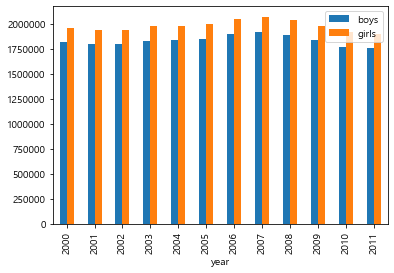

In [42]:
df_pd.plot(kind='bar')

In [56]:
sc.stop()